#**SETUP**

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [2]:
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [3]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.0/584.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 26.8 MB/s eta 0:00:00
Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


#**DETECTION**

In [4]:
# Train YOLOv8n on COCO128 for 100 epochs
!yolo train model=yolov8n.pt data=coco128.yaml epochs=100 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 116MB/s]
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [5]:
!yolo val model=yolov8n.pt data=coco128.yaml

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:10<00:00,  1.30s/it]
                   all        128        929       0.64      0.537      0.605      0.446
                person        128        254      0.797      0.677      0.764      0.538
               bicycle        128          6      0.514      0.333      0.315      0.264
                   car        128         46      0.813      0.217      0.273      0.168
            motorcycle        128          5      0.687      0.887      0.898      0.685
              airplane        128          6       0.82      0.833      0.927      0.675
                   bus        128      

In [6]:
!yolo predict model=yolov8n.pt source='https://i.natgeofe.com/k/e856e727-736f-4f66-a9c2-8c8fa9050794/netherlands-bicycles-amsterdam.jpg'

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 1.28M/1.28M [00:00<00:00, 40.6MB/s]
image 1/1 /content/netherlands-bicycles-amsterdam.jpg: 384x640 8 persons, 2 bicycles, 5 cars, 2 motorcycles, 1 truck, 1 handbag, 65.6ms
Speed: 3.7ms preprocess, 65.6ms inference, 114.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


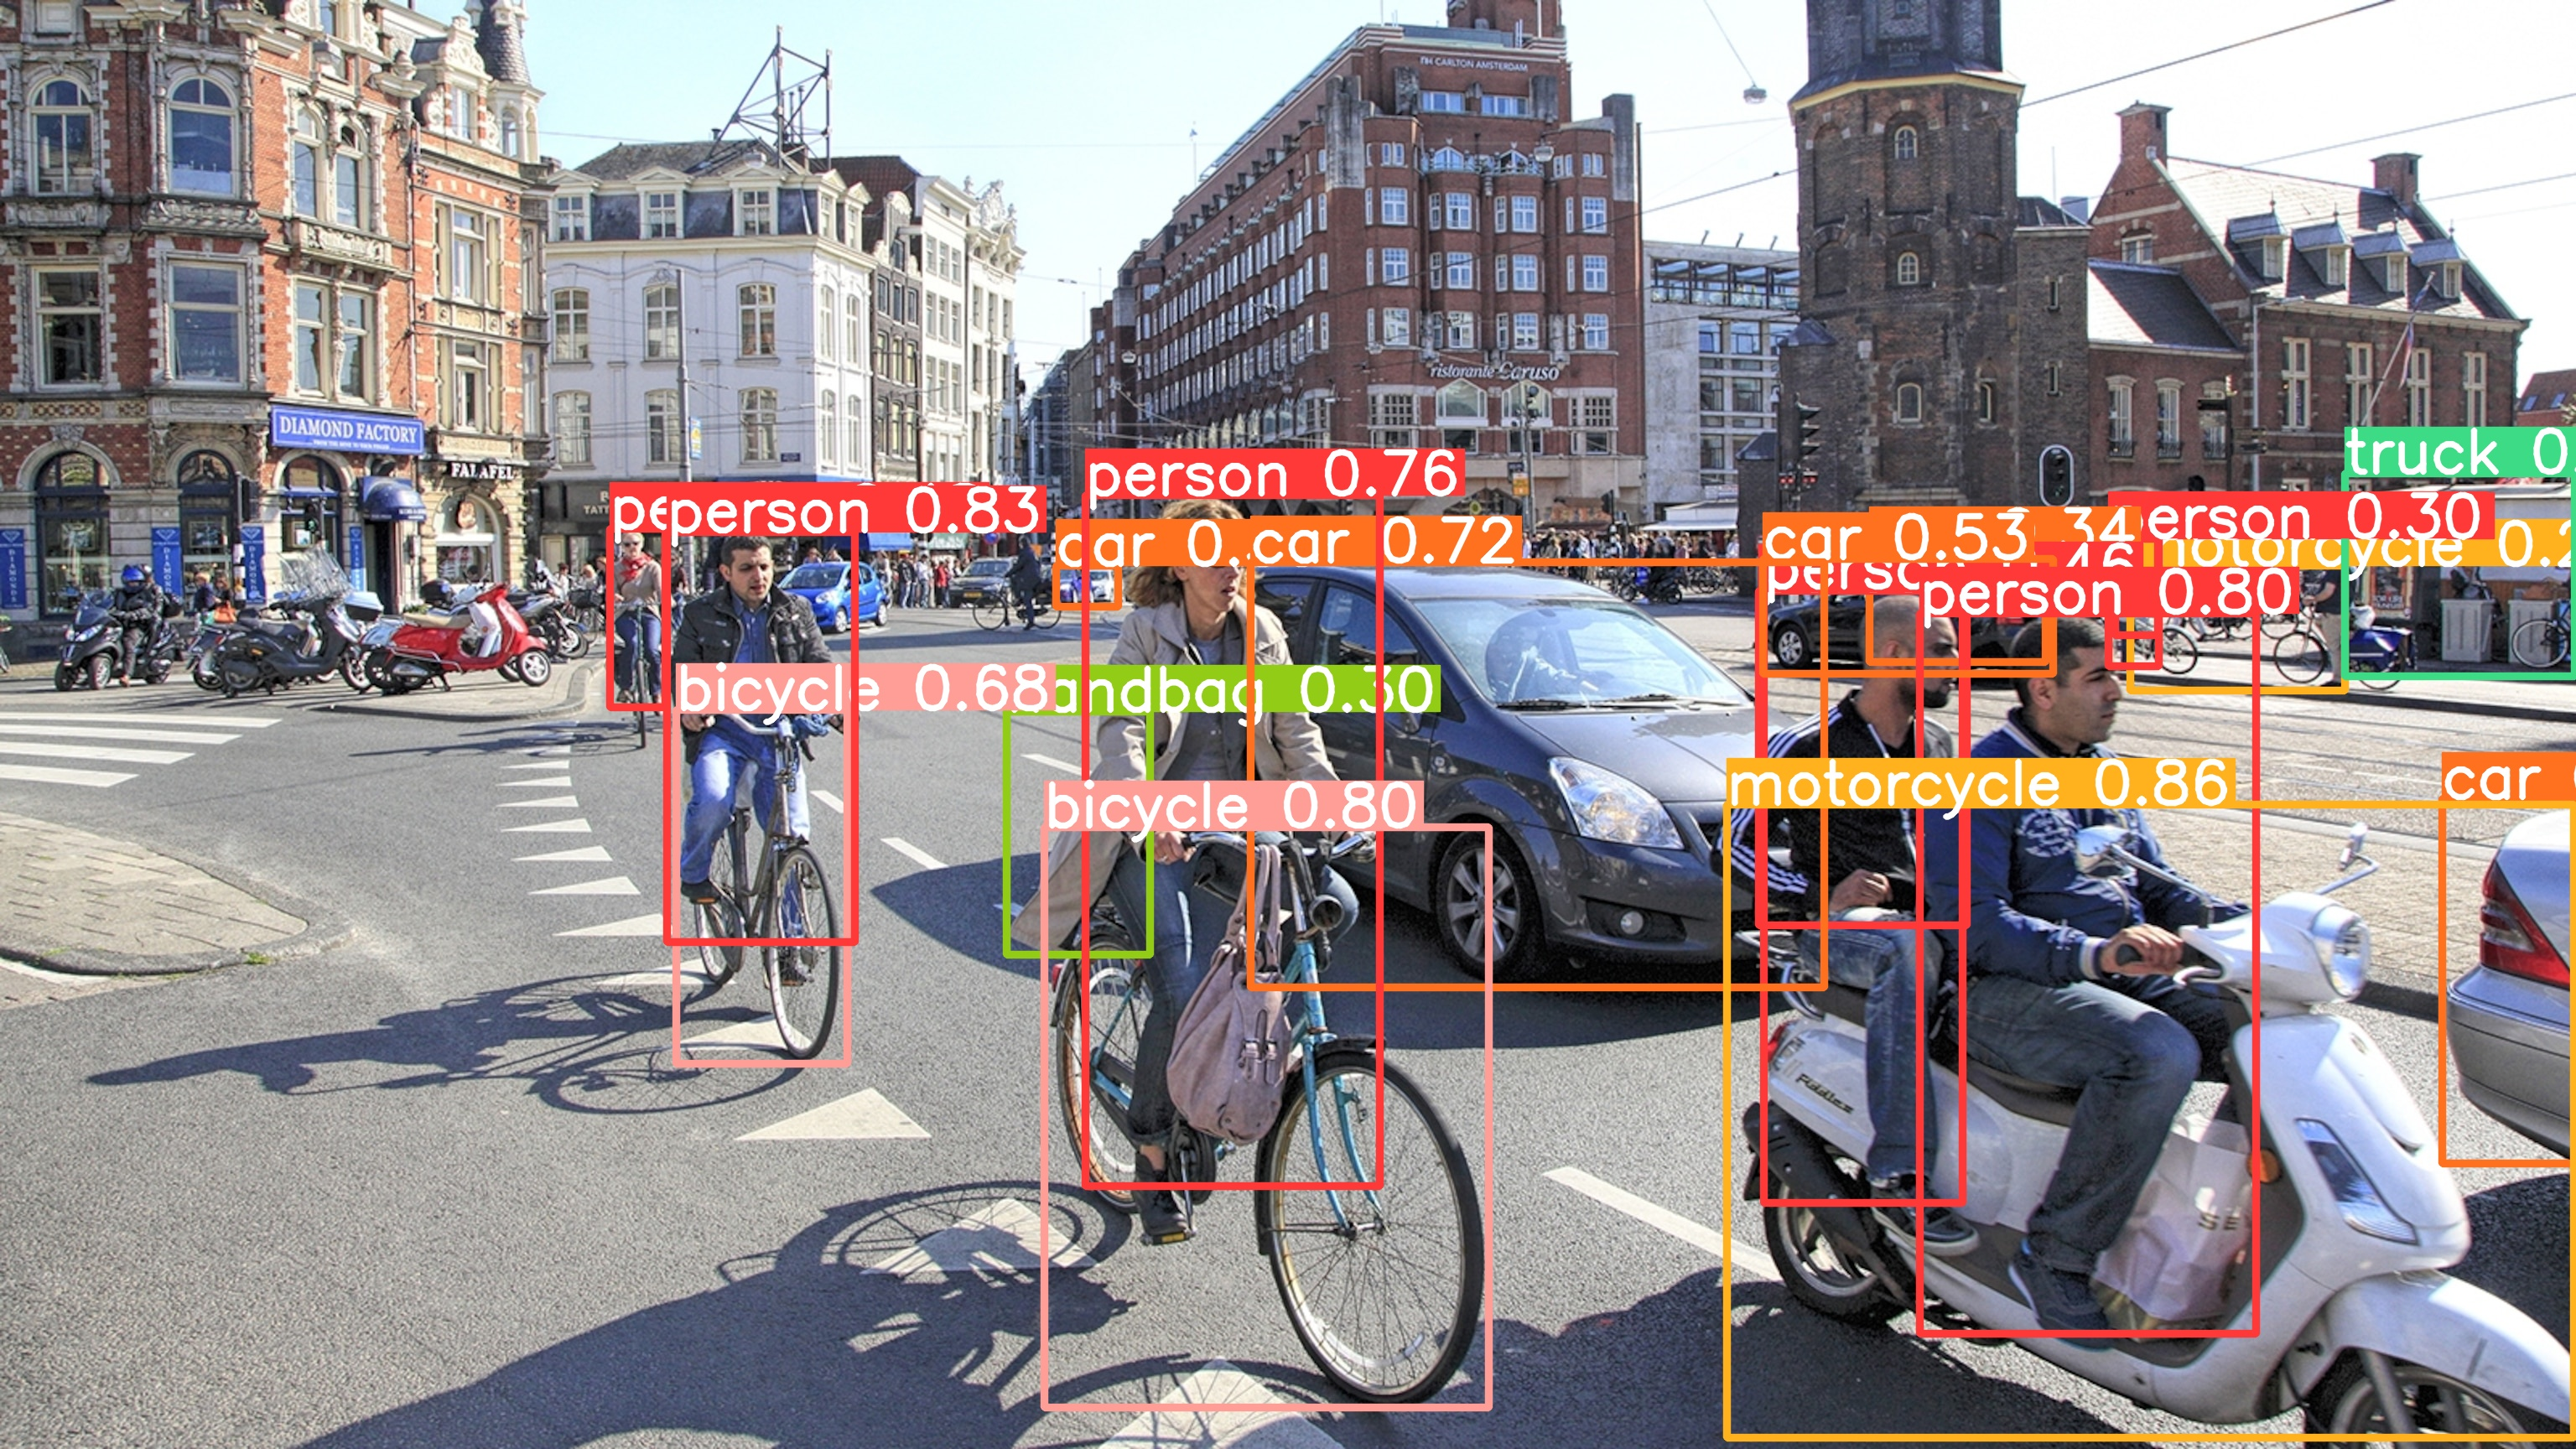

In [7]:
Image(filename=f'/content/runs/detect/predict/netherlands-bicycles-amsterdam.jpg', width=600)

#**SEGMENTATION**

In [8]:
# Train YOLOv8n on COCO128 for 100 epochs
!yolo train model=yolov8n-seg.pt data=coco128.yaml epochs=100 imgsz=640

100% 6.73M/6.73M [00:00<00:00, 130MB/s]
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

In [9]:
!yolo val model=yolov8n-seg.pt data=coco128.yaml

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/8 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 444, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 276, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*ar

In [10]:
!yolo predict model=yolov8n-seg.pt source='/content/netherlands-bicycles-amsterdam.jpg'

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/netherlands-bicycles-amsterdam.jpg: 384x640 6 persons, 2 bicycles, 4 cars, 5 motorcycles, 130.0ms
Speed: 3.8ms preprocess, 130.0ms inference, 114.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


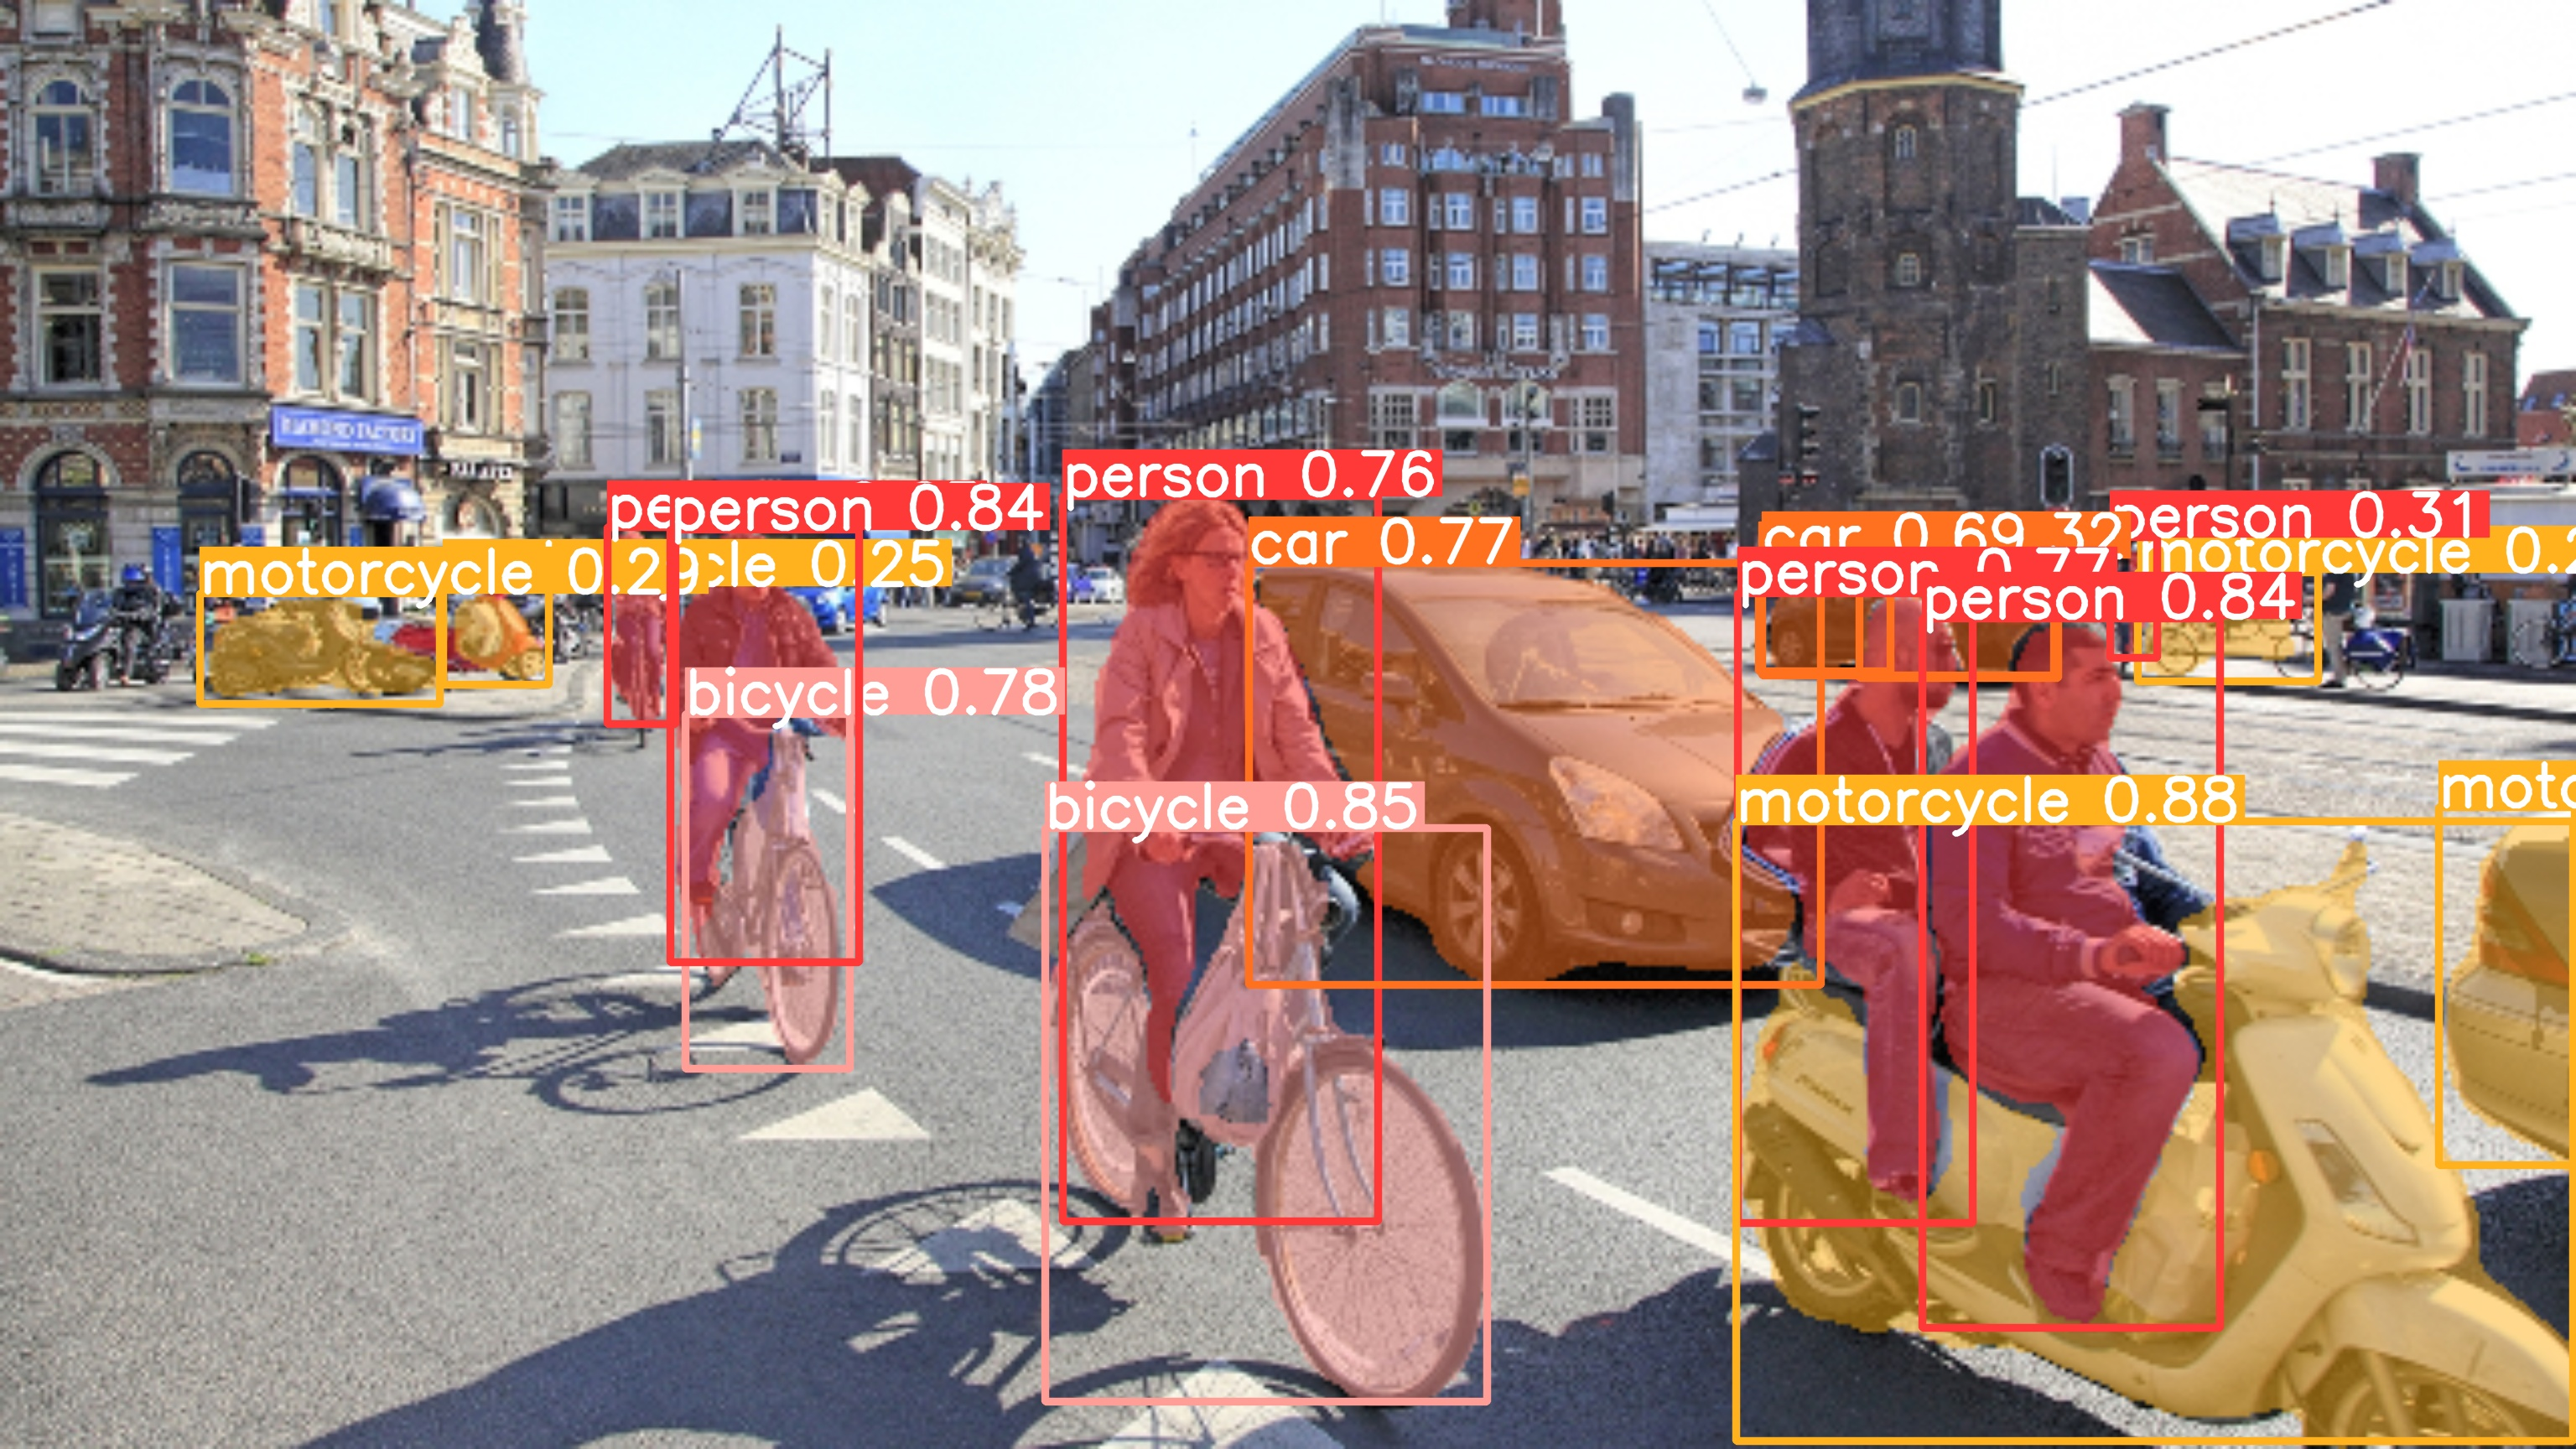

In [11]:
Image(filename=f'/content/runs/segment/predict/netherlands-bicycles-amsterdam.jpg', width=600)

#**RT-DETR**

In [12]:
# Train YOLOv8n on COCO128 for 100 epochs
!yolo train model=rtdetr-l.pt data=coco128.yaml epochs=100 imgsz=640

100% 63.4M/63.4M [00:00<00:00, 300MB/s]
Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=coco128.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

In [13]:
!yolo val model=rtdetr-l.pt data=coco128.yaml

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 494 layers, 32148140 parameters, 0 gradients
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:11<00:00,  1.47s/it]
                   all        128        929      0.847      0.737      0.844       0.65
                     0        128        254      0.942      0.693       0.86      0.639
                     1        128          6          1      0.414      0.634      0.441
                     2        128         46      0.751      0.393      0.641      0.332
                     3        128          5      0.885          1      0.995      0.823
                     4        128          6       0.93          1      0.995      0.921
                     5        128          7      0.842 

In [14]:
!yolo predict model=rtdetr-l.pt source='/content/netherlands-bicycles-amsterdam.jpg'

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 494 layers, 32148140 parameters, 0 gradients

image 1/1 /content/netherlands-bicycles-amsterdam.jpg: 640x640 26 0s, 12 1s, 7 2s, 4 3s, 2 7s, 6 9s, 1 11, 4 24s, 76.3ms
Speed: 3.7ms preprocess, 76.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


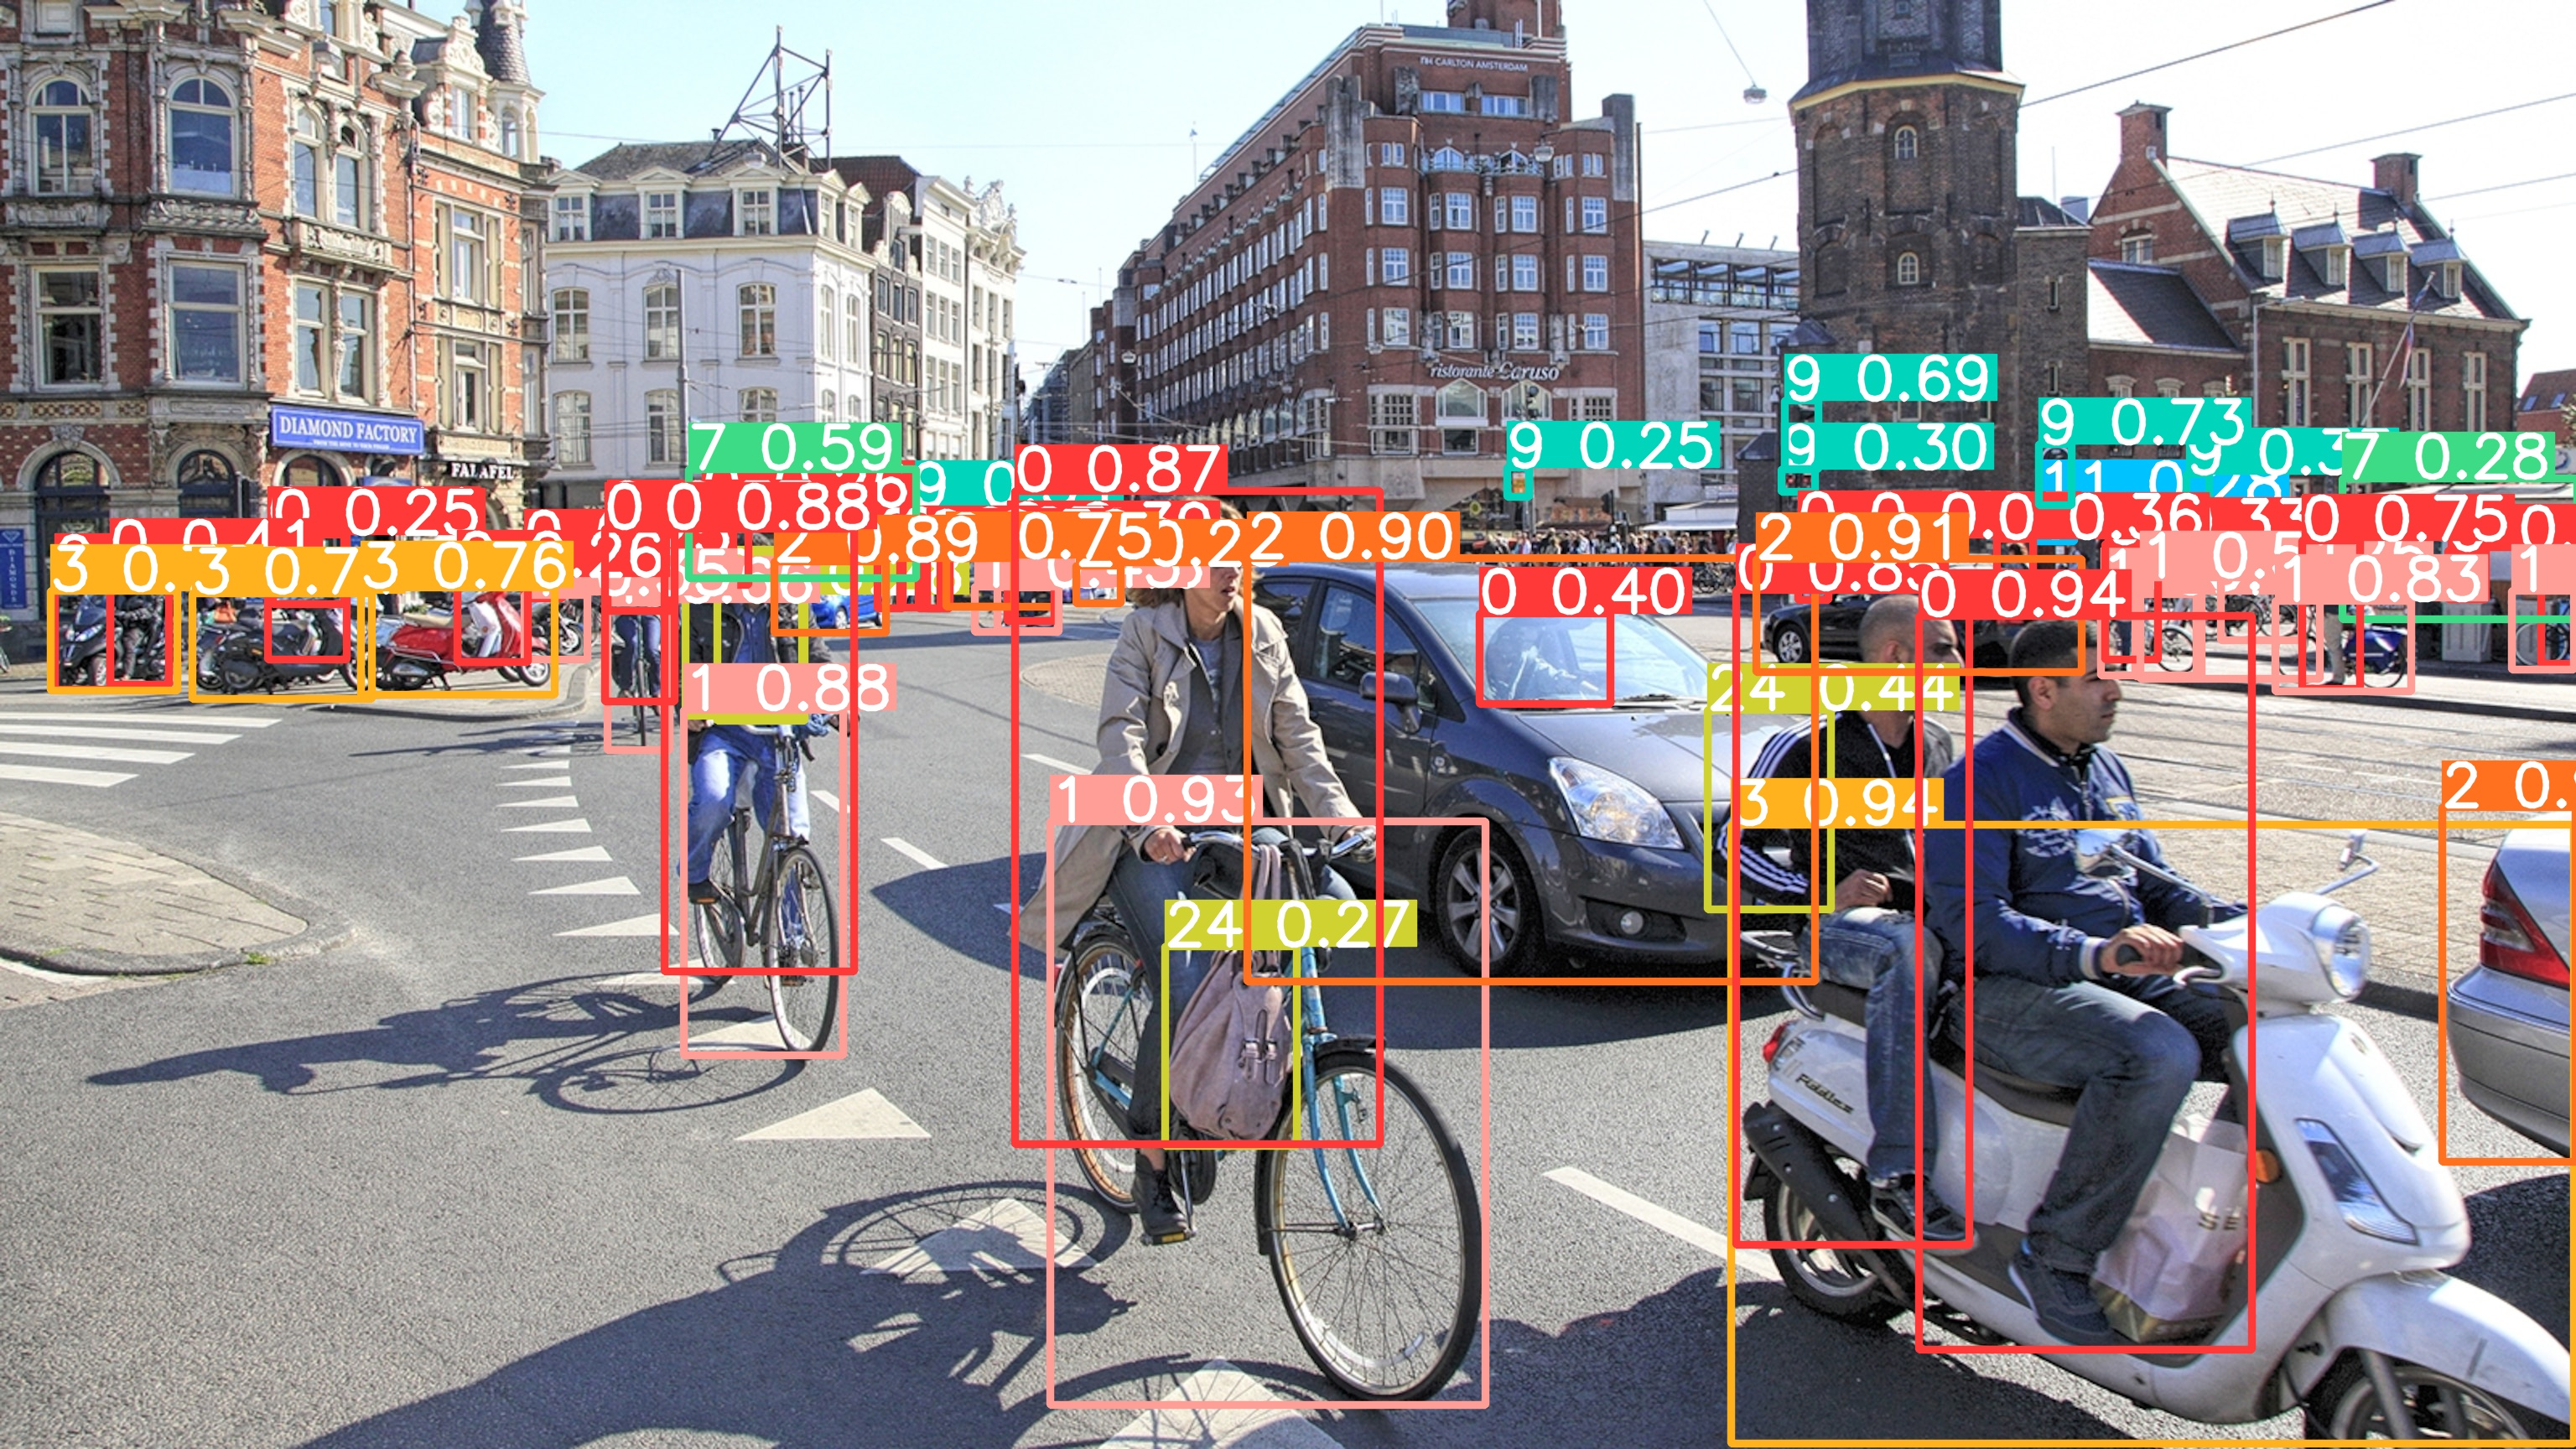

In [15]:
Image(filename=f'/content/runs/detect/predict2/netherlands-bicycles-amsterdam.jpg', width=600)